# Numerical Simulations of Two Level Atom and the RWA
The goal of this notebook is to numerically integrate the equations for two level dynamics and compare the results with and without the use of the Rotating Wave approximation. 
The dynamics with the RWA are described by
\begin{align*}
    \frac{d^2c_g(t)}{dt^2}&=i\delta \frac{dc_g(t)}{dt}-\frac{\Omega^2}{4}c_g(t)  \\
     \frac{d^2c_e(t)}{dt^2}&=-i\delta \frac{dc_e(t)}{dt}-\frac{\Omega^2}{4}c_e(t) 
\end{align*}
The analytic solutions are 
\begin{align}
c_g(t) &= \left(\cos\frac{\Omega' t}{2}-i\frac{\delta}{\Omega'}\sin\frac{\Omega't}{2}\right)e^{i\delta t/2}  \\
c_e(t) &= -i\frac{\Omega}{\Omega'}\sin\frac{\Omega't}{2}e^{-i\delta t/2}\\
\Omega' &= \sqrt{\Omega^2 + \delta^2} 
\end{align}
In order to solve this second order equation numerically we seperate each equation into two first order ODE's, namely
\begin{align}
\dot{c_g} &= x \\
\dot{x} &=i\delta x-\frac{\Omega^2}{4}c_g(t)\\
\dot{c_e} &= y \\
\dot{y} &=-i\delta y-\frac{\Omega^2}{4}c_g(t)
\end{align}


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import time
%matplotlib inline

##Variables
W=.125*2*np.pi*1e5  ##Rabi Frequency

d = 0  ##Detuning
Wp= math.sqrt(W**2+d**2)

#Initial Conditions 
del_t = (4*np.pi/W)/(10e3)
t = np.arange(0,4*np.pi/W,del_t)

xg = [[0,0] for i in range(len(t))]; pg= [[0,0] for i in range(len(t))]; xe = [[0,0] for i in range(len(t))]; pe = [[0,0] for i in range(len(t))]
pg[0] = [1,0]; xg[0] = [0,0]; pe[0] = [0,0]; xe[0] = [0,-W*.5]

In [3]:
def DE_g(W,d,x,p):
    i = -d*x[0] - (W**2)*p[1]*.25
    r = d * x[1]  - (W**2)*p[0]*.25 
    return [r,i]

def DE_e(W,d,x,p):
    i = d*x[0] - (W**2)*p[1]*.25
    r = -d * x[1]  - (W**2)*p[0]*.25 
    return [r,i]

def Mod_fun(num):
    r = [i[0] for i in num]
    r2 = [k**2 for k in r]
    c = [i[1] for i in num]
    c2 = [k**2 for k in c]
    return [sum(x) for x in zip(r2, c2)]
    

##Euler Method##
def Euler(DE,x,p, W,d,t):
    for i in range(len(t))[1:]:
        x[i][0] = x[i-1][0]+del_t*DE(W,d,x[i-1],p[i-1])[0]
        p[i][0] = p[i-1][0]+del_t*x[i-1][0]
        x[i][1] = x[i-1][1]+del_t*DE(W,d,x[i-1],p[i-1])[1]
        p[i][1] = p[i-1][1]+del_t*x[i-1][1]
    return(p)
   

time 0.2260725498199463
10000


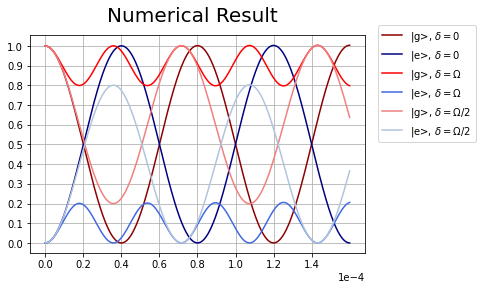

In [4]:
t0 = time.time()
d = 0
##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(np.arange(0, (4*np.pi)/W, .2*10e-5))
ax.set_yticks(np.arange(0, 1.01, .1))
plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,d,t)), color = 'darkred',label="|g>, $\delta = 0$ ")
plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,d,t)), color = 'navy',label = '|e>, $\delta = 0$')
plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,2*W,t)), color = 'red',label="|g>, $\delta = \Omega$ ")
plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,2*W,t)), color = 'royalblue',label = '|e>, $\delta = \Omega$')
plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,W/2,t)), color = 'lightcoral',label="|g>, $\delta = \Omega/2$ ")
plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,W/2,t)), color = 'lightsteelblue',label = '|e>, $\delta =\Omega/2$')
plt.legend(loc=(1.04,.51))

t1=time.time()
print('time', t1-t0)
print(len(t))
plt.grid()
plt.show()

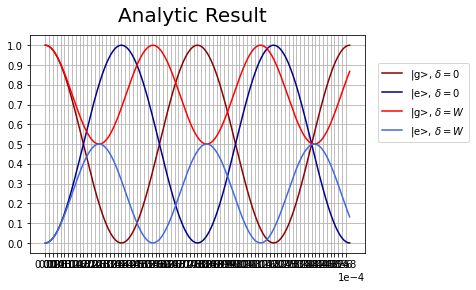

In [5]:
##Analytic Solution
Wp= math.sqrt(W**2+d**2)
d2=W
Wp2= math.sqrt(W**2+d2**2)
fig = plt.figure()
fig.suptitle('Analytic Result', fontsize=20)
ax = fig.gca()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(np.arange(0, (4*np.pi)/W, .2*10e-6))
ax.set_yticks(np.arange(0, 1.01, .1))
plt.plot(t, (np.cos(Wp*t/2))**2+(d/Wp)**2*(np.sin(Wp*t/2))**2, color = 'darkred',label="|g>, $\delta = 0$ ")
plt.plot(t, ((W/Wp)**2 * np.sin(Wp*t/2))**2, color = 'darkblue',label="|e>, $\delta = 0$ ")
plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'red',label="|g>, $\delta = W$ ")
plt.plot(t, ((W/Wp2) * np.sin(Wp2*t/2))**2, color = 'royalblue',label = '|e>, $\delta = W$')
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

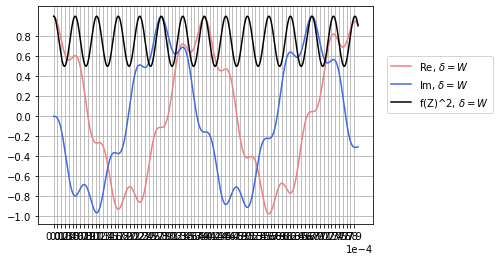

In [6]:
##Graphing imaginary and real parts of the populations
t2 = np.arange(0,5*4*np.pi/W,del_t)
d2=W
Wp2= math.sqrt(W**2+d2**2)
fig = plt.figure()
ax = fig.gca()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(np.arange(0, 5*(4*np.pi)/W, 1*10e-6))
ax.set_yticks(np.arange(-1.0, 1.0, .2))
plt.plot(t2, np.cos(Wp2*t2*.5)*np.cos(d2*t2/2)+(d2/Wp2)*np.sin(Wp2*t2*.5)*np.sin(d2*t2*.5), color = 'lightcoral',label="Re, $\delta = W$ ")
plt.plot(t2, -(d2/Wp2)*np.sin(Wp2*t2*.5)*np.cos(d2*t2/2)+np.sin(d2*t2*.5)*np.cos(Wp2*t2*.5), color = 'royalblue',label="Im, $\delta = W$ ")
plt.plot(t2, (-(d2/Wp2)*np.sin(Wp2*t2*.5)*np.cos(d2*t2*.5)+np.sin(d2*t2*.5)*np.cos(Wp2*t2*.5))**2+(np.cos(Wp2*t2*.5)*np.cos(d2*t2*.5)+(d2/Wp2)*np.sin(Wp2*t2*.5)*np.sin(d2*t2*.5))**2  , color = 'black',label="f(Z)^2, $\delta = W$ ")


plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

<font size = '3' color=blue> Now we examine the numerical solutions if the rotating wave approximation is not made, note the solutions become
\begin{align*}
    \ddot{c}_g(t)&=  - \omega_l \frac{dc_g(t)}{dt}\tan(\omega_lt) - i\omega_0\frac{dc_g(t)}{dt}-c_g(t)|\Omega|^2\cos^2(\omega_l t)\\
    \ddot{c}_e(t)&=  - \omega_l \frac{dc_e(t)}{dt}\tan(\omega_lt) + i\omega_0\frac{dc_e(t)}{dt}-c_e(t)|\Omega|^2\cos^2(\omega_l t)\\
\end{align*}

This is not an algabraic form that lends itself well to being simulated, fortunately we can rewrite the equations as 
\begin{align*}
    \ddot{c}_g(t) &=  i\delta \dot{c}_g \left(\frac{ e^{i\delta t}}{e^{i\delta t} + e^{-i\Sigma t}}\right)-i\Sigma \dot{c}_g\left(\frac{ e^{-i\Sigma t}}{ e^{i\delta t} + e^{-i\Sigma t}}\right)- c_g \left|\frac{\Omega}{2}\right|^2 ( 2 + e^{-i(\Sigma+\delta) t} + e^{i(\Sigma+\delta) t}) \\
    \ddot{c}_e(t) &= -i\delta \dot{c}_g \left(\frac{ e^{i\delta t}}{e^{i\delta t} + e^{-i\Sigma t}}\right)+i\Sigma \dot{c}_g\left(\frac{ e^{-i\Sigma t}}{ e^{i\delta t} + e^{-i\Sigma t}}\right)- c_e \left|\frac{\Omega}{2}\right|^2 (2+ e^{-i(\Sigma+\delta) t}+ e^{i(\Sigma+\delta) t}  )\\
\end{align*}
Where we define
$$\delta =\omega_l-\omega_0 \hspace{2 cm}
    \Sigma = \omega_l+\omega_0$$
</font>


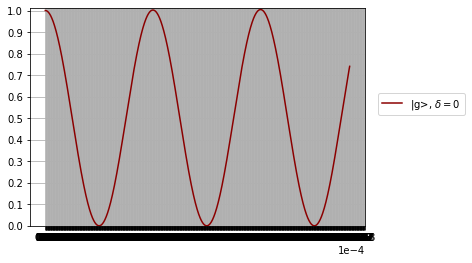

time 13.841729164123535


In [7]:
def complex_fraction(x,y,u,v):
    r = (x*u+v*y)/(u**2+v**2)
    i = (y*u-x*v)/(u**2+v**2)
    return [r,i]

# def generate_fast_osc(delta,sigma,t)
#     r = (1+np.cos(delta*t))
    
    
def DE_RW_g(W,delta,sigma,x,p,t,sd,cd,ss,cs):
    var1 = complex_fraction(cd,sd,cd+cs,sd-ss)
    var2 = complex_fraction(cs,-ss,cd+cs,sd-ss)
    r =  -delta*(x[0]*var1[1]+x[1]*var1[0]) + 0*sigma*(x[0]*var2[1]+x[1]*var2[0]) -(W**2)*p[0]*np.cos((sigma-delta)*t)**2 
    i =  delta*(x[0]*var1[0]-x[1]*var1[1]) - 0*sigma*(x[0]*var2[0]-x[1]*var2[1]) - (W**2)*p[1]*np.cos((sigma-delta)*t)**2
    i=0
    return [r,i]

def DE_RW_e(W,delta,sigma,x,p,t):
    var1 = complex_fraction(cd,sd,cd+cs,sd-ss)
    var2 = complex_fraction(cs,-ss,cd+cs,sd-ss)
    r =  delta*(x[0]*var1[1]+x[1]*var1[0]) + 0*sigma*(x[0]*var2[1]+x[1]*var2[0]) -(W**2)*p[0]*np.cos((sigma-delta)*t)**2 
    i =  -delta*(x[0]*var1[0]-x[1]*var1[1]) - 0*sigma*(x[0]*var2[0]-x[1]*var2[1]) - (W**2)*p[1]*np.cos((sigma-delta)*t)**2
    i=0
    return [r,i]
def Euler_RW(DE,x,p, W,delta,sigma,t):
    sd= np.sin(delta*t)
    cd = np.cos(delta*t)
    ss = np.sin(-sigma*t)
    cs = np.cos(-sigma*t)
    for i in range(len(t))[1:]:
        x[i][0] = x[i-1][0]+del_t*DE(W,delta,sigma,x[i-1],p[i-1],t[i],sd[i],cd[i],ss[i],cs[i])[0]
        p[i][0] = p[i-1][0]+del_t*x[i-1][0]
        x[i][1] = DE(W,delta,sigma,x[i-1],p[i-1],t[i],sd[i],cd[i],ss[i],cs[i])[1]
        p[i][1] = p[i-1][1]+del_t*x[i-1][1]
    return(p)
import time
t0 = time.time()
del_t = (1/W)*10e-4
t = np.arange(0,4*np.pi/W,del_t)
delta = 0
d=delta
Wp= math.sqrt(W**2+d**2)
w0 = W*10e5
wl= d+w0
sigma = wl+w0 
                                       
xg = [[0,0] for i in range(len(t))]; pg= [[0,0] for i in range(len(t))]; xe = [[0,0] for i in range(len(t))]; pe = [[0,0] for i in range(len(t))]
pg[0] = [1,0]; xg[0] = [0,0]; pe[0] = [0,0]; xe[0] = [0,-W*.5]

fig = plt.figure()
ax = fig.gca()
ax.set_ylim([0,1.01])
ax.set_xticks(np.arange(0, (10*4*np.pi)/W, .2*10e-7))
ax.set_yticks(np.arange(0, 1.1, .1))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



plt.plot(t,Mod_fun(Euler_RW(DE_RW_g,xg,pg,W,delta,sigma,t)), color = 'darkred',label="|g>, $\delta = 0$ ")
# plt.plot(t,Mod_fun(Euler_RW(DE_RW_e,xe,pe,W,delta,sigma,t)), color = 'navy',label = '|e>, $\delta = 0$')
# plt.plot(t,Mod_fun(Euler_RW(DE_RW_g,xg,pg,W,w0,w0+W,t)), color = 'red',label="|g>, $\delta = \Omega$ ")
# plt.plot(t,Mod_fun(Euler_RW(DE_RW_e,xe,pe,W,w0,w0+W,t)), color = 'royalblue',label = '|e>, $\delta = \Omega$')
# plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,W/2,t)), color = 'lightcoral',label="|g>, $\delta = \Omega/2$ ")
# plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,W/2,t)), color = 'lightsteelblue',label = '|e>, $\delta =\Omega/2$')
# plt.plot(t, (np.cos(Wp*t/2))**2+(d/Wp)**2*(np.sin(Wp*t/2))**2, color = 'darkred', linestyle = '--', label="|g>, $\delta = 0$ ")
# plt.plot(t, ((W/Wp)**2 * np.sin(Wp*t/2))**2, color = 'darkblue', linestyle = '--',label="|e>, $\delta = 0$ ")


# (pg,x)=Euler_RW(DE_RW_g,xg,pg,W,delta,sigma,t)
# print(W)
# print(pg[:20])
# print(x[:20])

plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

tf =time.time()
print('time', tf-t0)

<font size = '3' color=blue> Next we will simultate the coupled equations to compare
\begin{align*}
    i\dot{c}_g(t) &= c_e(t)  \frac{\Omega}{2}(e^{i\delta t} + e^{-i\Sigma t})\\
    i\dot{c}_e(t) &= c_g(t)  \frac{\Omega}{2}( e^{-i\delta t} + e^{i\Sigma t})\\
\end{align*}

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
%matplotlib inline

##Variables
W=.125*2*np.pi*1e5  ##Rabi Frequency
Wp= math.sqrt(W**2+d**2)

#Initial Conditions 
del_t = (1/W)*10e-4
t = np.arange(0,4*np.pi/W,del_t)

delta = 0
d=delta
Wp= math.sqrt(W**2+d**2)
w0 = 1e16
wl= d+w0
sigma = wl+w0 

pg= [[0,0] for i in range(len(t))]; pe = [[0,0] for i in range(len(t))]
pg[0] = [1,0]; pe[0] = [0,0]; 


In [21]:
def DE_g(W,pe,cs,cd,ss,sd):
    i = (W/2)*(-pe[0]*(cd+cs)+pe[1]*(sd-ss))
    r = (W/2)*(pe[0]*(sd-ss)+pe[1]*(cd+cs))
    return [r,i]

def DE_e(W,pg,cs,cd,ss,sd):
    i = (W/2)*(-pg[0]*(cd+cs)+pg[1]*(ss-sd))
    r = (W/2)*(pg[0]*(ss-sd)+pg[1]*(cd+cs))
    return [r,i]


def Mod_fun(num):
    r = [i[0] for i in num]
    r2 = [k**2 for k in r]
    c = [i[1] for i in num]
    c2 = [k**2 for k in c]
    return [sum(x) for x in zip(r2, c2)]
    

##Euler Method##
def Euler(pg,pe, W,delta,sigma,t):
    sd= np.sin(delta*t)
    cd = np.cos(delta*t)
    ss = np.sin(-sigma*t)
    cs = np.cos(-sigma*t)
    for i in range(len(t))[1:]:
        xg = DE_g(W,pe[i-1],cs[i],cd[i],ss[i],sd[i])
        xe = DE_e(W,pg[i-1],cs[i],cd[i],ss[i],sd[i])
        pg[i][0] = pg[i-1][0]+del_t*xg[0]
        pg[i][1] = pg[i-1][1]+del_t*xg[1]
        pe[i][0] = pe[i-1][0]+del_t*xe[0]
        pe[i][1] = pe[i-1][1]+del_t*xe[1]
    return(pg,pe)
   

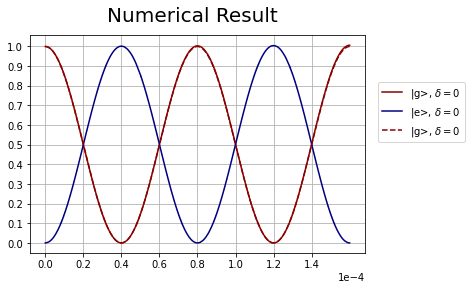

In [22]:
##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(np.arange(0, (4*np.pi)/W, .2*10e-5))
ax.set_yticks(np.arange(0, 1.01, .1))
p1 = Euler(pg,pe,W,delta,sigma,t)
plt.plot(t,Mod_fun(p1[0]), color = 'darkred',label="|g>, $\delta = 0$ ")
plt.plot(t,Mod_fun(p1[1]), color = 'navy',label = '|e>, $\delta = 0$')
# plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,2*W,t)), color = 'red',label="|g>, $\delta = \Omega$ ")
# plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,2*W,t)), color = 'royalblue',label = '|e>, $\delta = \Omega$')
# plt.plot(t,Mod_fun(Euler(DE_g,xg,pg,W,W/2,t)), color = 'lightcoral',label="|g>, $\delta = \Omega/2$ ")
# plt.plot(t,Mod_fun(Euler(DE_e,xe,pe,W,W/2,t)), color = 'lightsteelblue',label = '|e>, $\delta =\Omega/2$')
plt.plot(t, (np.cos(Wp*t/2))**2+(d/Wp)**2*(np.sin(Wp*t/2))**2, color = 'darkred', linestyle = '--', label="|g>, $\delta = 0$ ")

plt.legend(loc=(1.04,.51))

plt.grid()
plt.show()